# Predykcja czasu dostawy zamówienia


## Wczytanie danych z plików

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
from datetime import datetime
import time
from pandasql import sqldf

ModuleNotFoundError: No module named 'pandasql'

In [2]:
deliveriesFile = open("IUM21L_Zad_03_02/deliveries.jsonl", "r")
productsFile = open("IUM21L_Zad_03_02/products.jsonl", "r")
sessionsFile = open("IUM21L_Zad_03_02/sessions.jsonl", "r")
usersFile = open("IUM21L_Zad_03_02/users.jsonl", "r")

deliveries = [json.loads(jline) for jline in deliveriesFile.read().splitlines()]
products = [json.loads(jline) for jline in productsFile.read().splitlines()]
sessions = [json.loads(jline) for jline in sessionsFile.read().splitlines()]
users = [json.loads(jline) for jline in usersFile.read().splitlines()]

print(deliveries[0].keys())
print(products[0].keys())
print(sessions[0].keys())
print(users[0].keys())

dict_keys(['purchase_id', 'purchase_timestamp', 'delivery_timestamp', 'delivery_company'])
dict_keys(['product_id', 'product_name', 'category_path', 'price'])
dict_keys(['session_id', 'timestamp', 'user_id', 'product_id', 'event_type', 'offered_discount', 'purchase_id'])
dict_keys(['user_id', 'name', 'city', 'street'])


## Wykorzystywane funkcje

In [3]:
# Convert date to unix timestamp (seconds only)
def dateToTimestamp(date):
    date = date.split('.')[0]
    date = datetime.strptime(date, "%Y-%m-%dT%H:%M:%S").timetuple()
    return time.mktime(date)

def timestampToDate(timestamp):
    return datetime.fromtimestamp(timestamp).strftime("%Y-%m-%dT%H:%M:%S")

## Analiza danych

### Ceny produktów

Niektóre ceny są błędne - ujemne lub bardzo duże

In [4]:
products.sort(key=lambda product : product["price"])
print("Price \t Product")
for product in products:
    print(str(product["price"])+"\t"+product["product_name"])

Price 	 Product
-142.99	Race Driver Grid (PC)
-121.9	The Darkness 2 (PC)
-112.28	Sencor SDA-500
-109.0	Fight Night Champion (PS3)
-79.9	Assassin&#39;s Creed 3 (PS3)
-69.99	Sencor SDA-600
-49.99	Assassin&#39;s Creed 3 (Xbox 360)
-39.0	Sniper Ghost Warrior 2 (Xbox 360)
-37.9	Bioshock 2 (PC)
-32.99	Call of Duty Black Ops 2 (PC)
-19.99	Symulator Agrar 2012 (PC)
-19.99	Space Hack (PC)
-14.9	Sniper Ghost Warrior (PC)
-11.9	Street Racing Syndicate (PC)
-9.99	King&#39;s Bounty Nowe Światy (PC)
-1.0	Król Futbolu Piłkarski Quiz (PC)
1.0	Heroes Over Europe (PC)
1.0	The Ball (PC)
1.99	Street Fighter 4 (PC)
3.0	Dragonshard (PC)
3.59	Hearts of Iron 2 (PC)
4.9	Dream Pinball 3D (PC)
4.99	Cities in Motion (PC)
4.99	A New Beginning (PC)
4.99	Rig&#39;n&#39;Roll Tirowiec (PC)
4.99	Symulator Kamieniołomu (PC)
5.0	Symulator Zamiatarki ulic (PC)
7.9	Warhammer 40.000 Space Marine (PC)
8.9	Singularity (PC)
8.99	MAJESTY ANTOLOGIA (PC)
8.99	Euro Truck Simulator (PC)
9.99	Bus Driver (PC)
9.99	Hard Reset (PC)
9.99

### Analiza czasu dostawy

382 purchases not delivered
7258 purchases delivered


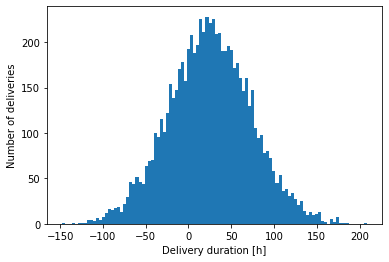

In [5]:
notDeliveredList = [delivery for delivery in deliveries if delivery['delivery_timestamp'] is None]
deliveredList = [delivery for delivery in deliveries if delivery['delivery_timestamp'] is not None]
print(str(len(notDeliveredList))+" purchases not delivered")
print(str(len(deliveredList))+" purchases delivered")

deliveryTimes = [dateToTimestamp(delivery['delivery_timestamp']) for delivery in deliveredList]
purchaseTimes = [dateToTimestamp(delivery['purchase_timestamp']) for delivery in deliveredList]

deliveryDurations = [(deliveryTime - purchaseTime)/3600 for deliveryTime, purchaseTime in zip(deliveryTimes, purchaseTimes)]

plt.hist(deliveryDurations, density=False, bins=100)
plt.ylabel('Number of deliveries')
plt.xlabel('Delivery duration [h]')
plt.show()

Company 620
2321 deliveries


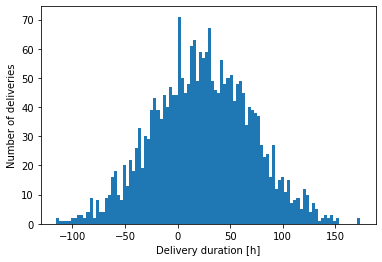

Company None
337 deliveries


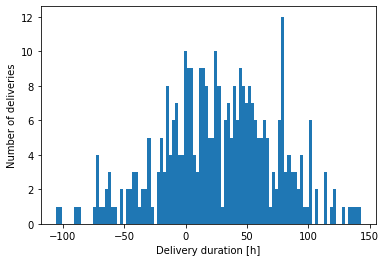

Company 516
2305 deliveries


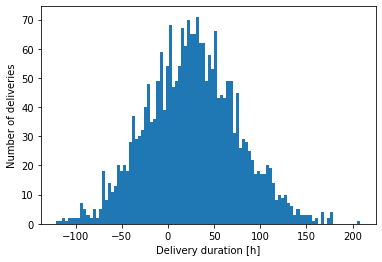

Company 360
2295 deliveries


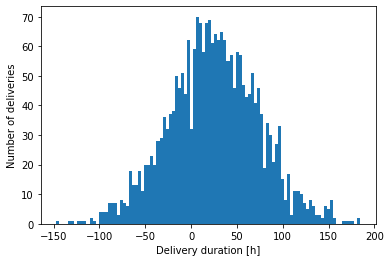

In [6]:
companies = []
for delivery in deliveries:
    if delivery['delivery_company'] not in companies:# and delivery['delivery_company'] is not None:
        companies.append(delivery['delivery_company'])

for company in companies:
    print('Company '+str(company))
    durations = []
    counter = 0
    for delivery in deliveredList:
        if delivery['delivery_company'] == company:
            counter += 1
            durations.append((dateToTimestamp(delivery['delivery_timestamp']) - dateToTimestamp(delivery['purchase_timestamp']))/3600)
    print(str(counter)+' deliveries')
    plt.hist(durations, density=False, bins=100)
    plt.ylabel('Number of deliveries')
    plt.xlabel('Delivery duration [h]')
    plt.show()